In [ ]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X, Y = load_digits(return_X_y=True)

In [ ]:
X = X/255

In [ ]:
km = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state = 0)
y_km = km.fit_predict(X)

In [ ]:
print("Coeficiente de Silhueta K-Means: %0.3f" % metrics.silhouette_score(X, y_km,metric='euclidean'))

Coeficiente de Silhueta K-Means: 0.182


In [ ]:
#scale = StandardScaler()
#X_scaled = scale.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
PCA_X = pca.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


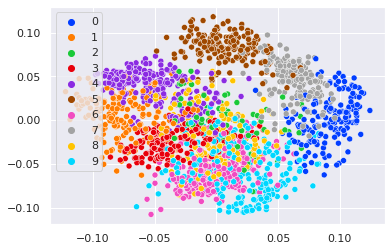

In [ ]:
sns.scatterplot(PCA_X[:,0], PCA_X[:,1], hue=y_km, legend='full', palette=palette)

In [ ]:
km = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state = 0)
y_km = km.fit_predict(PCA_X)

In [ ]:
print("Coeficiente de Silhueta K-Means: %0.3f" % metrics.silhouette_score(PCA_X, y_km,metric='euclidean'))

Coeficiente de Silhueta K-Means: 0.393


In [ ]:
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


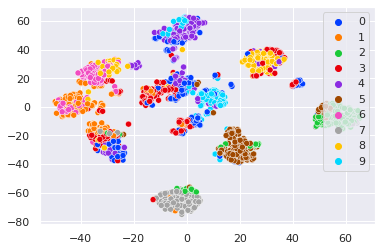

In [ ]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_km, legend='full', palette=palette)

In [ ]:
inertia = []
for n in range(1 , 21):
    km = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 0) )
    km.fit(X_embedded)
    inertia.append(km.inertia_)

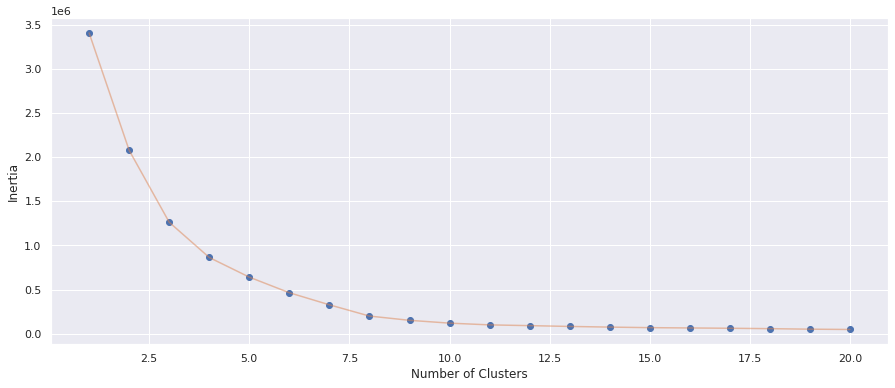

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 21) , inertia, 'o')
plt.plot(np.arange(1 , 21) , inertia, '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
km = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state = 0)
y_km = km.fit_predict(X_embedded)

In [ ]:
print("Coeficiente de Silhueta K-Means: %0.3f" % metrics.silhouette_score(X_embedded, y_km,metric='euclidean'))

Coeficiente de Silhueta K-Means: 0.636
